## Import thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Đọc dữ liệu

In [2]:
data_df = pd.read_json('luc_luong_lao_dong.json')

In [3]:
data_df

,dataset
dimension,"{'Địa phương': {'label': 'Địa phương', 'catego..."
label,Lực lượng lao động từ 15 tuổi trở lên phân the...
source,None
status,{'130': None}
updated,9999-12-31T16:59:59Z
value,"[44904.5, 47160.3, 48209.6, 49322.0, 50473.5, ..."


## Tiền xử lý dữ liệu

Như bảng trên, dữ liệu từ file json vẫn chưa thể sử dụng, trước đó ta cần chuyển về định dạng dòng cột hợp lý để có thể xử lý bằng pandas

Trước hết, ta lọc ra label của các năm

In [4]:
year_label = list(data_df['dataset']['dimension']['Năm']['category']['label'].values())
year_label

['2005',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 'Sơ bộ 2021']

Đổi label cuối cùng thành '2021' cho dễ nhìn hơn

In [5]:
year_label[-1] = '2021'

Tiếp theo, lấy label của tất cả các địa phương

In [6]:
diaPhuong_label = data_df['dataset']['dimension']['Địa phương']['category']['label'].values()
diaPhuong_label

dict_values(['CẢ NƯỚC', 'Đồng bằng sông Hồng', 'Hà Nội', 'Hà Tây', 'Vĩnh Phúc', 'Bắc Ninh', 'Quảng Ninh', 'Hải Dương', 'Hải Phòng', 'Hưng Yên', 'Thái Bình', 'Hà Nam', 'Nam Định', 'Ninh Bình', 'Trung du và miền núi phía Bắc', 'Hà Giang', 'Cao Bằng', 'Bắc Kạn', 'Tuyên Quang', 'Lào Cai', 'Yên Bái', 'Thái Nguyên', 'Lạng Sơn', 'Bắc Giang', 'Phú Thọ', 'Điện Biên', 'Lai Châu', 'Sơn La', 'Hòa Bình', 'Bắc Trung Bộ và duyên hải miền Trung', 'Thanh Hóa', 'Nghệ An', 'Hà Tĩnh', 'Quảng Bình', 'Quảng Trị', 'Thừa Thiên - Huế', 'Đà Nẵng', 'Quảng Nam', 'Quảng Ngãi', 'Bình Định', 'Phú Yên', 'Khánh Hòa', 'Ninh Thuận', 'Bình Thuận', 'Tây Nguyên', 'Kon Tum', 'Gia Lai', 'Đắk Lắk', 'Đắk Nông', 'Lâm Đồng', 'Đông Nam Bộ', 'Bình Phước', 'Tây Ninh', 'Bình Dương', 'Đồng Nai', 'Bà Rịa - Vũng Tàu', 'TP. Hồ Chí Minh', 'Đồng bằng sông Cửu Long', 'Long An', 'Tiền Giang', 'Bến Tre', 'Trà Vinh', 'Vĩnh Long', 'Đồng Tháp', 'An Giang', 'Kiên Giang', 'Cần Thơ', 'Hậu Giang', 'Sóc Trăng', 'Bạc Liêu', 'Cà Mau'])

Tiếp theo, lấy dữ liệu của từng ô

In [7]:
value = np.array(data_df['dataset']['value']).reshape(len(diaPhuong_label), len(year_label))
value

array([[44904.5, 47160.3, 48209.6, ..., 55767.4, 54842.94, 50560.5],
       [10728.4, 11032.5, 11057.0, ..., 12438.2, 12182.1, 11436.7],
       [1553.1, 1653.7, 3421.2, ..., 4118.3, 4124.62, 3939.9],
       ...,
       [720.3, 707.8, 722.3, ..., 657.9, 641.91, 614.1],
       [439.4, 451.6, 483.1, ..., 518.1, 507.76, 480.9],
       [581.6, 625.5, 654.1, ..., 690.9, 669.77, 596.8]], dtype=object)

Cuối cùng, lưu dữ liệu vào dataframe

In [8]:
data = pd.DataFrame(data = value, index = diaPhuong_label, columns = year_label)
data = data.fillna(value=np.nan)
data

,2005,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
CẢ NƯỚC,44904.5,47160.3,48209.6,49322.0,50473.5,51594.3,52616.6,53549.3,54040.70,54266.0,54482.8,54819.6,55388.0,55767.4,54842.94,50560.5
Đồng bằng sông Hồng,10728.4,11032.5,11057.0,11147.5,11520.0,11662.1,11918.0,12175.1,12248.33,12268.4,12217.0,12273.3,12345.1,12438.2,12182.10,11436.7
Hà Nội,1553.1,1653.7,3421.2,3405.8,3614.6,3639.2,3807.9,3893.3,3935.69,4005.2,4006.3,4024.2,4064.8,4118.3,4124.62,3939.9
Hà Tây,1571.7,1575.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vĩnh Phúc,677.1,705.2,591.5,606.3,611.0,617.3,622.3,631.9,652.32,633.6,627.4,625.3,630.5,647.4,634.47,578.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cần Thơ,627.4,680.6,684.4,656.0,677.3,687.5,695.5,685.6,682.41,723.2,723.1,726.2,731.0,720.2,716.78,584.3
Hậu Giang,428.7,444.9,447.2,453.9,454.2,446.1,440.4,449.4,439.99,440.0,450.2,455.8,450.7,420.3,402.33,394.1
Sóc Trăng,720.3,707.8,722.3,756.9,752.0,726.7,724.5,705.7,666.15,658.8,682.7,674.4,670.1,657.9,641.91,614.1
Bạc Liêu,439.4,451.6,483.1,474.3,483.9,510.3,509.9,506.1,507.75,514.1,513.5,514.5,516.7,518.1,507.76,480.9


### Khám phá dữ liệu (định dạng của dữ liệu)
Sau khi thực hiện bước đầu tiền xử lý dữ liệu, ta được một bảng với các dòng là tên của các tỉnh/vùng miền. Tên các cột là các năm. Dữ liệu cho thấy lực lượng lao động của từng tỉnh/vùng miền qua các năm. Đơn vị của các ô là nghìn người.

Ta tách riêng các vùng miền như 'CẢ NƯỚC', 'Đồng bằng sông Hồng',.. riêng ra 1 dataframe để dễ xử lý

In [9]:
region = ['Đồng bằng sông Hồng', 'Trung du và miền núi phía Bắc', 'Bắc Trung Bộ và duyên hải miền Trung',
         'Đồng bằng sông Cửu Long', 'Đông Nam Bộ', 'Tây Nguyên']
region_df = data.loc[data.index.isin(region)] 


#Bỏ các dòng là CẢ NƯỚC hoặc là 1 khu vực
data = data.drop(data[(data.index == 'CẢ NƯỚC') | (data.index.isin(region))].index)
#data
region_df

,2005,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Đồng bằng sông Hồng,10728.4,11032.5,11057.0,11147.5,11520.0,11662.1,11918.0,12175.1,12248.33,12268.4,12217.0,12273.3,12345.1,12438.2,12182.10,11436.7
Trung du và miền núi phía Bắc,6275.6,6547.4,6561.2,6801.7,6903.1,7082.1,7229.0,7417.5,7488.08,7443.0,7502.4,7541.6,7670.1,7736.2,7665.63,5866.7
Bắc Trung Bộ và duyên hải miền Trung,9748.5,10061.7,10322.5,10577.0,10979.7,11197.0,11379.6,11686.4,11839.93,11743.9,11723.6,11737.1,11793.7,11830.5,11557.57,10462.3
Tây Nguyên,2548.9,2624.7,2693.4,2855.7,2931.0,3052.7,3135.5,3223.7,3309.37,3301.7,3323.5,3367.8,3410.7,3486.0,3456.58,3520.1
Đông Nam Bộ,6248.2,7121.4,7680.3,7894.0,8048.9,8426.2,8680.9,8822.3,8996.79,9322.2,9514.2,9701.7,9888.0,10174.4,10082.15,9913.3
Đồng bằng sông Cửu Long,9354.9,9772.7,9895.2,10046.1,10090.8,10174.2,10273.6,10224.3,10158.20,10186.8,10202.1,10198.1,10280.4,10102.1,9898.90,9361.4


## Khám phá dữ liệu

Dùng hàm describe để xem xét các chỉ số như count, mean, std, Q1, Q3,.. để có cái nhìn chung hơn về dữ liệu.

In [10]:
data.describe().round(2)

,2005,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,64.00,64.00,63.00,63.00,63.00,63.00,63.00,63.00,63.00,63.00,63.00,63.00,63.00,63.00,63.00,63.00
mean,701.63,736.88,765.23,782.89,801.17,818.96,835.18,849.99,857.79,861.37,864.81,870.15,879.17,885.20,870.52,802.55
std,458.42,508.01,619.01,622.23,644.90,660.28,678.80,692.12,700.98,717.53,723.13,731.98,744.48,761.75,757.38,734.64
min,168.40,177.20,179.80,189.80,194.50,199.90,204.50,213.40,216.13,212.40,212.50,208.70,216.50,211.00,205.97,144.60
25%,437.80,450.35,465.15,467.60,479.60,495.00,512.40,512.05,516.77,518.10,519.65,514.65,526.10,520.75,515.95,452.30
50%,598.55,628.70,630.80,639.50,653.10,677.90,695.50,685.60,689.39,712.40,713.60,705.00,707.00,707.20,692.83,614.10
75%,811.62,876.75,846.75,900.90,912.75,928.85,959.20,965.90,978.44,972.30,966.65,965.25,976.45,941.00,920.66,916.60
max,2966.40,3568.10,3856.50,3868.50,3903.70,4050.10,4160.40,4198.90,4274.27,4420.70,4493.70,4578.70,4684.90,4826.00,4769.63,4622.50


- Như thấy trên, dữ liệu rất đầy đủ và không có gì bất thường. Ngoài trừ count của năm 2008 trở đi thì sẽ là 63. Điều này là do năm 2008 trở đi thì tỉnh Hà Tây đã sát nhập vào Hà Nội, nên dữ liệu của nó không còn nữa, điều này là bình thường.
- Giá trị min và max chênh lệch rất lớn, chứng tỏ lực lượng lao động phân bố rất không đồng đều.
- Giá trị max gấp gần 6 lần giá trị trung bình và gấp 5 lần giá trị Q3. Lực lương lao động ở đây lên đến 4622.5 (nghìn người) năm 2021, trong khi đó bảng trên ta đã biết cả nước 2021 khoảng 50000 (nghìn người). Như vậy ở đây gần bằng 10% cả nước. Chứng tỏ lực lượng lao động chủ yếu tập trung ở thành phố lớn.

 Để tiện xử lý, ta drop Hà Tây ra khỏi bảng

In [11]:
data = data.drop(index=('Hà Tây'))
#data

## Câu hỏi: Lực lượng lao động của nước ta thay đổi như thế nào theo từng tỉnh và vùng miền từ năm 2005-2021?

Trả lời câu hỏi này giúp ta biết được lực lượng lao động của nước ta theo từng vùng, từng địa phương, sự thay đổi của nó theo thời gian như thế nào? Lực lượng lao động cũng là một tiêu chí để đánh giá sự phát triển của một vùng, biết được sự thay đổi của lực lượng lao động có thể biết được sự phát triển của địa phương. Ngoài ra, nó còn giúp nhiều cho những người đang gặp vấn đề tuyển dụng hoặc mở công ty ở trụ sở mới. Khi một người chuyển nhà, họ cũng cần tìm hiểu lực lượng lao động ở đó như thế nào để đánh giá độ khó khăn của kiếm việc làm khi đến đó.

### Trước hết, ta cùng tìm hiểu về sự thay đổi về lực lượng lao động qua các năm.

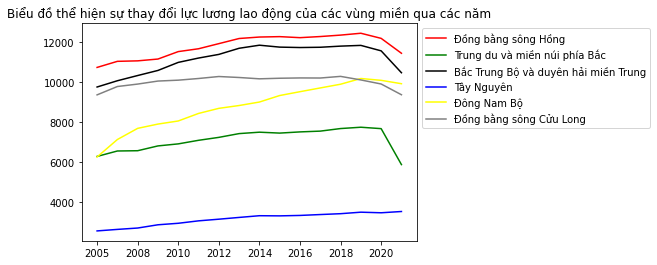

In [12]:
ax = region_df.transpose().plot.line(title = "Biểu đồ thể hiện sự thay đổi lực lương lao động của các vùng miền qua các năm",
                                    color = ['red', 'green','black','blue','yellow','gray'])
ax.legend(bbox_to_anchor=(1.0, 1.0))

Nhận xét:
- Tất cả các khu vực đều có lực lương lao động tăng dần theo các năm kể từ 2005-2019. Riêng các năm 2020, 2021 thì có xu hướng giảm. Giải thích cho điều này là do ảnh hưởng covid 19, khiến nhiều người mất việc làm.
- Lực lượng lao động Việt Nam tăng do dân số nước ta ngày càng tăng. Lực lượng lao động tăng giúp nước ta có nguồn lao động dồi dào, giúp ích cho phát triển kinh tế, tuy nhiên cũng dần xảy ra nhiều tệ nạn xã hội hơn trước.
- Trong các khu vực, khu vực đồng bằng sông Hồng có lực lượng lao động lớn nhất, dẫn đầu cả nước. Đây là nơi có địa hình thuận lợi, tập trung dân cư. 
- Tây nguyên địa hình phức tạp, khí hậu khắc nghiệt, dân cư thưa thớt nên lực lượng lao động luôn thấp so với phần còn lại của cả nước.
- Đông Nam Bộ là nơi có xu hướng gia tăng lực lượng lao động lớn nhất, đây là vùng đất phát triển nhanh, đầy tiềm năng.

### Tiếp theo, ta vẽ biểu đồ để trực quan cho lực lượng lao động của từng tỉnh

In [13]:
#Vẽ biểu đồ map, nếu chưa cài đặt geopandas thì phải cài đặt trước.
#!conda update --all -y
#!conda install geopandas -y

Để vẽ trực quan, cần import thư viện vẽ bản đồ và bản đồ Việt Nam

In [14]:
import geopandas
url = "https://data.opendevelopmentmekong.net/dataset/999c96d8-fae0-4b82-9a2b-e481f6f50e12/resource/234169fb-ae73-4f23-bbd4-ff20a4fca401/download/diaphantinh.geojson"
df_map = geopandas.read_file(url)
#df_map

Kiểm tra xem tên tỉnh thành của 2 bên đã khớp chưa

In [15]:
s1 = sorted(set(df_map['ten_tinh']).difference(set(data.index)))
s2 = sorted(set(data.index).difference(set(df_map['ten_tinh'])))
print(s1)
print(s2)

['Bà Rịa -Vũng Tàu', 'Cần Thơn', 'Kien Giang', 'Quản Bình', 'Thừa Thiên Huế', 'Đăk Lăk', 'Đăk Nông']
['Bà Rịa - Vũng Tàu', 'Cần Thơ', 'Kiên Giang', 'Quảng Bình', 'Thừa Thiên - Huế', 'Đắk Lắk', 'Đắk Nông']


Như vậy, các tỉnh thành ở map có một số bị sai chính tả, cần sửa lại

In [16]:
for i in range(len(s1)):
    df_map['ten_tinh'] = df_map['ten_tinh'].replace(s1[i], s2[i])
df_map = df_map.set_index('ten_tinh')

Gộp bảng map và value

In [17]:
value_map_df = pd.merge(df_map, data, left_index=True, right_index=True)
#value_map_df.head(5)

Hàm vẽ hình trực quan lực lượng lao động theo tỉnh thành

In [18]:
def draw_year(year, ax):
    ax.set_axis_off()
    value_map_df.plot(ax = ax, column = year, legend = True,  legend_kwds={'shrink': 0.5})
    ax.set_title(f"Biểu đồ lực lượng lao động của các tỉnh thành năm {year}")


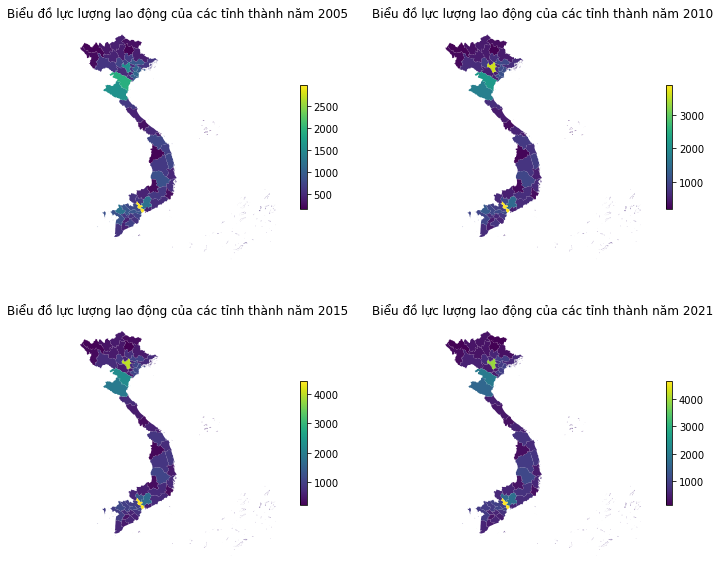

In [19]:
fig, ax = plt.subplots(2,2, figsize = (12,10))
draw_year('2005', ax[0, 0])
draw_year('2010', ax[0, 1])
draw_year('2015', ax[1, 0])
draw_year('2021', ax[1, 1])



Nhận xét:
- Biểu đồ trên cho thấy sự phân bố lực lượng lao động của các tỉnh thành nước ta.
- Tp.Hồ Chí Minh, Hà Nội và các khu vực lân cận luôn là những vùng có lực lượng lao động lớn nhất cả nước, đây là 2 trung tâm kinh tế lớn, sẽ 
- Các tỉnh miền núi phía Bắc và một số tỉnh Tây Nguyên là vùng có lực lượng lao động thấp nhất cả nước
- Theo các năm, lực lượng lao động đang có xu hướng tăng dần.